<a href="https://colab.research.google.com/github/AlimamHu/stock-price-pridiction-nifty-50-/blob/main/stock_price_pridiction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  1)           All nescery file import 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# That was data  from '**NIFTY 50**' due '**23-Feb-2020 - 23-Feb-2021**'

In [2]:
df =pd.read_csv('/content/NSEI.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-24,12012.549805,12012.549805,11813.400391,11829.400391,11829.400391,490800.0
1,2020-02-25,11877.500000,11883.049805,11779.900391,11797.900391,11797.900391,461000.0
2,2020-02-26,11738.549805,11783.250000,11639.599609,11678.500000,11678.500000,567600.0
3,2020-02-27,11661.250000,11663.849609,11536.700195,11633.299805,11633.299805,608600.0
4,2020-02-28,11382.000000,11384.799805,11175.049805,11201.750000,11201.750000,809900.0
...,...,...,...,...,...,...,...
246,2021-02-17,15279.900391,15314.299805,15170.750000,15208.900391,15208.900391,504800.0
247,2021-02-18,15238.700195,15250.750000,15078.049805,15118.950195,15118.950195,770600.0
248,2021-02-19,15074.799805,15144.049805,14898.200195,14981.750000,14981.750000,712200.0
249,2021-02-22,14999.049805,15010.099609,14635.049805,14675.700195,14675.700195,609900.0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df=df[['Date','Close']]

In [6]:
df.columns=['ds','y']

In [7]:
print(df)

             ds             y
0    2020-02-24  11829.400391
1    2020-02-25  11797.900391
2    2020-02-26  11678.500000
3    2020-02-27  11633.299805
4    2020-02-28  11201.750000
..          ...           ...
246  2021-02-17  15208.900391
247  2021-02-18  15118.950195
248  2021-02-19  14981.750000
249  2021-02-22  14675.700195
250  2021-02-23  14804.049805

[251 rows x 2 columns]


In [8]:
df.dtypes

ds     object
y     float64
dtype: object

In [9]:
from fbprophet import Prophet                 #contain string time serice

In [10]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# **23-Feb-2020 - 23-Feb-2021**  END OF THE **DATA** DATE . NOW **FUTURE** DATE  **2022-02-23**  WITH DATA.

In [11]:
future=prophet.make_future_dataframe(periods=365)         # 365 days+

In [12]:
print(future)

            ds
0   2020-02-24
1   2020-02-25
2   2020-02-26
3   2020-02-27
4   2020-02-28
..         ...
611 2022-02-19
612 2022-02-20
613 2022-02-21
614 2022-02-22
615 2022-02-23

[616 rows x 1 columns]


In [13]:
forecast = prophet.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,11709.185397,11291.147386,12057.880511,11709.185397,11709.185397,-54.521727,-54.521727,-54.521727,-54.521727,-54.521727,-54.521727,0.0,0.0,0.0,11654.663670
1,2020-02-25,11601.368134,11231.020395,11972.362955,11601.368134,11601.368134,-7.817347,-7.817347,-7.817347,-7.817347,-7.817347,-7.817347,0.0,0.0,0.0,11593.550788
2,2020-02-26,11493.550872,11150.458656,11871.599935,11493.550872,11493.550872,15.359510,15.359510,15.359510,15.359510,15.359510,15.359510,0.0,0.0,0.0,11508.910382
3,2020-02-27,11385.733610,11013.596542,11732.659010,11385.733610,11385.733610,12.534585,12.534585,12.534585,12.534585,12.534585,12.534585,0.0,0.0,0.0,11398.268194
4,2020-02-28,11277.916347,10904.188567,11649.058299,11277.916347,11277.916347,-6.786765,-6.786765,-6.786765,-6.786765,-6.786765,-6.786765,0.0,0.0,0.0,11271.129582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,2022-02-19,24557.873005,12709.567012,36556.716401,12728.342886,36456.927397,20.615875,20.615875,20.615875,20.615875,20.615875,20.615875,0.0,0.0,0.0,24578.488879
612,2022-02-20,24583.593616,12770.627552,36726.513917,12666.285226,36511.146714,20.615870,20.615870,20.615870,20.615870,20.615870,20.615870,0.0,0.0,0.0,24604.209486
613,2022-02-21,24609.314227,12827.339412,36718.780397,12604.227567,36617.198044,-54.521727,-54.521727,-54.521727,-54.521727,-54.521727,-54.521727,0.0,0.0,0.0,24554.792500
614,2022-02-22,24635.034839,12687.221128,36881.711088,12545.894829,36723.356698,-7.817347,-7.817347,-7.817347,-7.817347,-7.817347,-7.817347,0.0,0.0,0.0,24627.217492


In [14]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

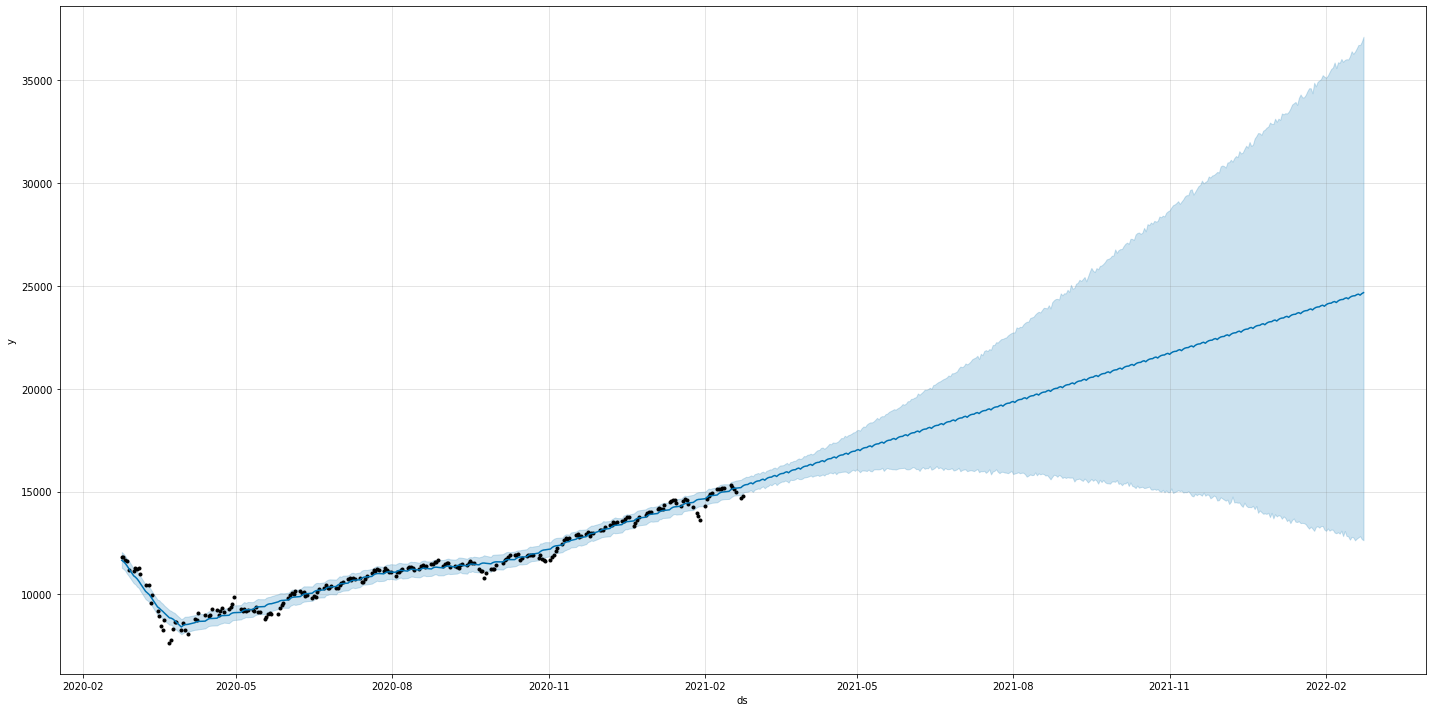

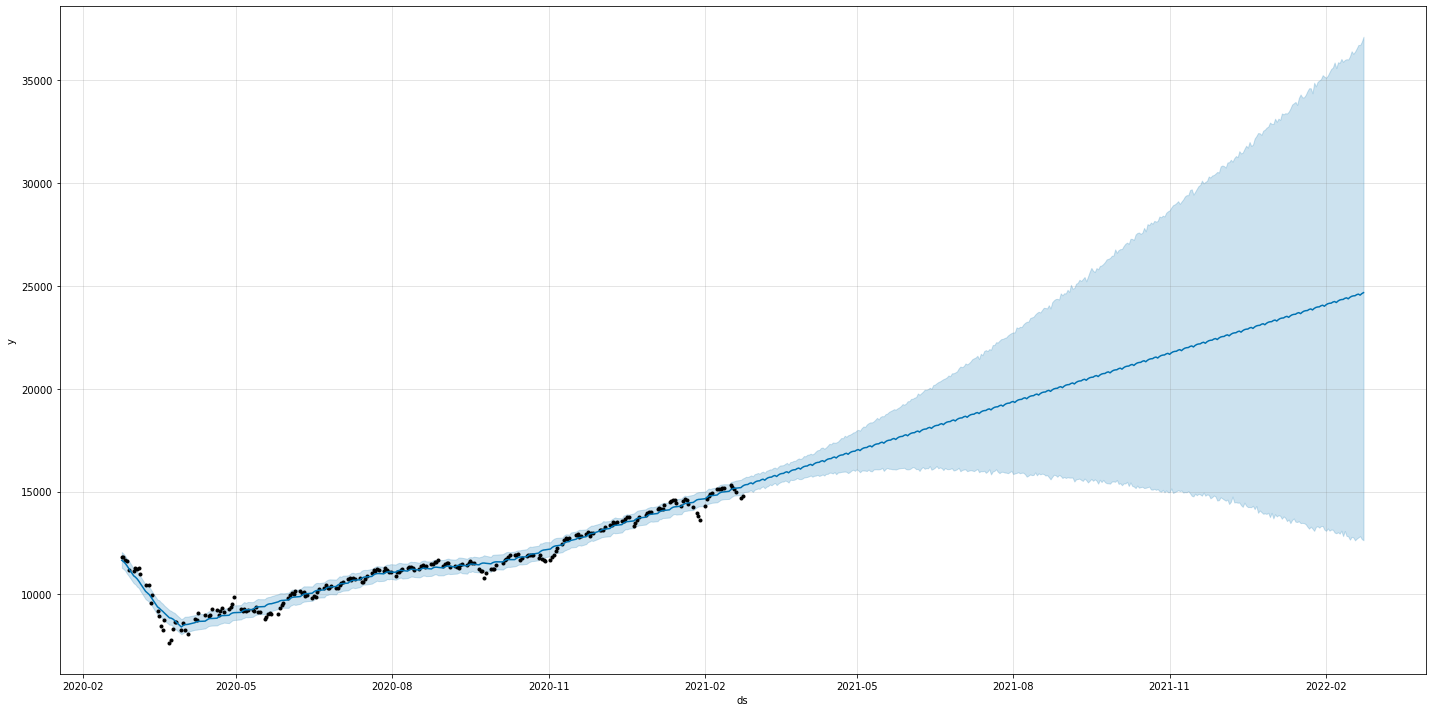

In [15]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))